In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [21]:
np.random.seed(2222)

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
print(X_train.shape, X_test.shape)
print(X_train.shape[0])

(60000, 28, 28) (10000, 28, 28)
60000


In [24]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels.'
assert(X_train.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'
assert(X_test.shape[1:] == (28, 28)), 'The dimensions of the images are not 28x28'

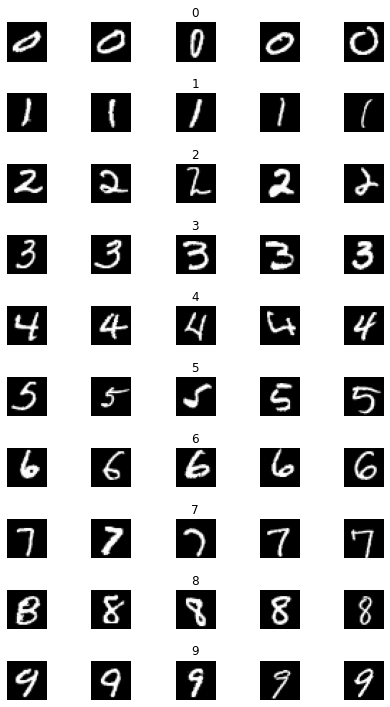

In [25]:
n_samples = []
cols=5
n_classes=10
fig, ax = plt.subplots(nrows=n_classes, ncols=cols, figsize=(6, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(n_classes):
        x_selected = X_train[y_train==j]
        ax[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        ax[j][i].axis('off')
        if i == int(cols/2):
            ax[j][i].set_title(str(j))
            n_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


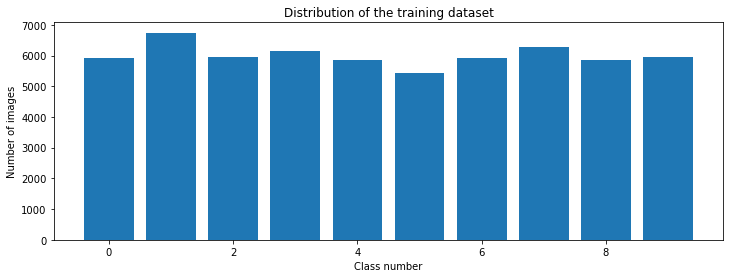

In [26]:
print(n_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), n_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [27]:
np.std(n_samples)

322.082908581005

In [28]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
y_train.shape

(60000, 10)

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [32]:
X_train.shape

(60000, 28, 28, 1)

In [33]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [35]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=True)

Epoch 1/10


2022-09-06 00:29:58.180635: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


135/135 [==============================] - 30s 220ms/step - loss: 0.2159 - accuracy: 0.9330 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 2/10
135/135 [==============================] - 35s 256ms/step - loss: 0.0520 - accuracy: 0.9840 - val_loss: 0.0384 - val_accuracy: 0.9880
Epoch 3/10
135/135 [==============================] - 31s 231ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0459 - val_accuracy: 0.9867
Epoch 4/10
135/135 [==============================] - 32s 237ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 5/10
135/135 [==============================] - 31s 232ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 6/10
135/135 [==============================] - 34s 251ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0398 - val_accuracy: 0.9908
Epoch 7/10
135/135 [==============================] - 30s 225ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0420 - val_accuracy: 0.9

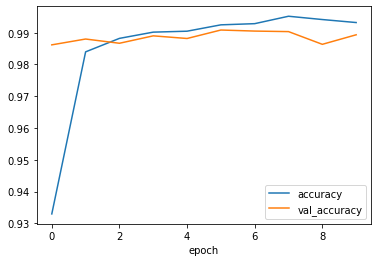

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

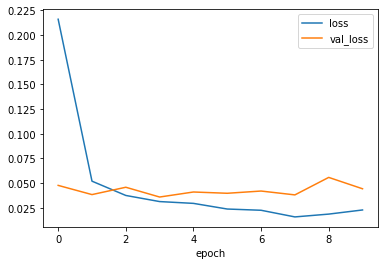

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

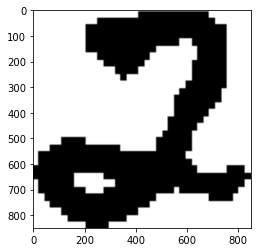

In [45]:
import requests
from PIL import Image
url = 'https://i.im.ge/2022/09/05/O8hkic.Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [46]:
import cv2
def prepare(img):
    img_array = np.asanyarray(img)
    resized = cv2.resize(img_array, (28, 28))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    final = cv2.bitwise_not(gray_scale)
    return final

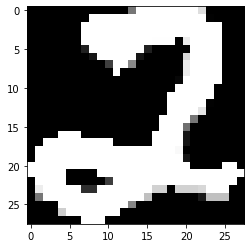

In [47]:
gray_img = prepare(img)
plt.imshow(gray_img, cmap=plt.get_cmap('gray'))

In [48]:
gray_img = gray_img/255
gray_img =gray_img.reshape(1, 28, 28)

In [49]:
prediction = model.predict(gray_img, verbose=0)
classes_x=np.argmax(prediction,axis=1)
print('predicted digit', str(classes_x))

predicted digit [2]
